# Pandas

In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
data = [[103, 'Kim', 'H'], 
        [222, 'Lee', 'W'], 
        [531, 'Jeong', 'S']]
df = pd.DataFrame(data=data)

In [10]:
df.iloc[0, 1:3]
# 출력 값이 시리즈로 나오는 이유는 
# iloc의 첫 인자가 인덱싱이면 시리즈만 반환

1    Kim
2      H
Name: 0, dtype: object

In [11]:
df.iloc[0:1, 1:3]
# iloc의 첫 인자가 슬라이싱이면 
# 요소가 하나인 데이터프레임으로 반환

,1,2
0,Kim,H


In [12]:
data = {"id": [103, 222, 531],
         "name": ["Kim", "Lee", "Jeong"]  }

df = pd.DataFrame(data)
# 인덱스에 이름 부여
df = df.rename_axis('번호')
df

,id,name
번호,,
0,103,Kim
1,222,Lee
2,531,Jeong


In [22]:
df.loc[[0,2], ["id","name"]]

,id,name
번호,,
0,103,Kim
2,531,Jeong


In [24]:
df.index.values

array([0, 1, 2], dtype=int64)

In [25]:
df.columns.values

array(['id', 'name'], dtype=object)

In [48]:
df = pd.DataFrame(data=np.random.randint(10, size=(3,4)),
                  columns=['col1', 'col2', 'col3', 'col4'])

df

,col1,col2,col3,col4
0,2,2,6,2
1,4,2,4,9
2,1,6,4,4


In [49]:
df[df['col2'] > 2]

,col1,col2,col3,col4
2,1,6,4,4


In [50]:
df.loc[(df['col2'] > 2), :]

,col1,col2,col3,col4
2,1,6,4,4


In [51]:
df['total'] = df.sum(axis=1)
df

,col1,col2,col3,col4,total
0,2,2,6,2,12
1,4,2,4,9,19
2,1,6,4,4,15


In [55]:
print(df.loc[(df['col2'] > 2) & (df['col3'] > 3), :])

   col1  col2  col3  col4  total
2     1     6     4     4     30


In [56]:
display(df.loc[(df['col2'] > 2) & (df['col3'] > 3), :])

,col1,col2,col3,col4,total
2,1,6,4,4,30


In [59]:
df.sum(axis=0)

col1      7
col2     10
col3     14
col4     15
total    92
dtype: int64

In [68]:
df = pd.DataFrame(np.random.randint(10, size=(3, 4)), columns=['col1', 'col2', 'col3', 'col4'])
df


df["col2"]
df.col2
df.loc[0, "col2":"col3"]

df.loc[0:0, "col2":"col3"]

df.loc[[0], "col2":"col3"]

df.loc[0:2, "col2":"col3"]
df.loc[(df["col2"] > 2) & (df["col3"] < 5), "col2":"col3"]
df.iloc[0, 1:3]
df.iloc[0:1, 1:3]
df.iloc[[0], 1:3]

df.iloc[0:3, 1:3]
df["total"] = df.sum(axis=1)
df

df = df.drop(columns=["col4", "total"], axis=1)
df

df.drop(index=1, axis=0)

df = pd.DataFrame([[1, 2, 3],
                   [4, 5, 6],
                   [np.nan, 8, 9],
                   [10, np.nan, 12]])
df

df.dropna(axis=0)

df.fillna(df.mean(axis=0))

In [90]:
df1 = pd.DataFrame({'name': ['이순신', '강감찬', '을지문덕', '김유신'],
                    'dept': ['연구개발', '영업', '연구개발', '인사']})
df2 = pd.DataFrame({'emp_name': ['강감찬', '을지문덕', '이순신', '이순신'],
                    'project': ["S", "D", "A", "S"]})

merged = pd.merge(df1, df2, left_on="name", right_on="emp_name").drop("emp_name", axis=1)
merged

,name,dept,project
0,이순신,연구개발,A
1,이순신,연구개발,S
2,강감찬,영업,S
3,을지문덕,연구개발,D


In [93]:
merged2 = pd.merge(df1, df2, left_on="name", right_on="emp_name", how='outer').fillna('')
merged2

,name,dept,emp_name,project
0,이순신,연구개발,이순신,A
1,이순신,연구개발,이순신,S
2,강감찬,영업,강감찬,S
3,을지문덕,연구개발,을지문덕,D
4,김유신,인사,,


In [96]:
display(merged2)
merged2.groupby("name")[["name"]].aggregate("count")
merged2.groupby("name")[["emp_name"]].aggregate("count")
merged2.groupby("dept")[["emp_name"]].aggregate("count")

,name,dept,emp_name,project
0,이순신,연구개발,이순신,A
1,이순신,연구개발,이순신,S
2,강감찬,영업,강감찬,S
3,을지문덕,연구개발,을지문덕,D
4,김유신,인사,,


,emp_name
dept,
연구개발,3
영업,1
인사,1


In [70]:
def to_rank(age) :
    if age >= 60 : return "노인"
    elif age >= 20  : return "성인"
    elif age > 13  : return "청소년"
    return "어린이"
        

titanic['age_rank2'] = titanic['age'].apply(to_rank)
titanic[["age", "age_rank2"]]

,age,age_rank2
0,22.0,성인
1,38.0,성인
2,26.0,성인
3,35.0,성인
4,35.0,성인
...,...,...
886,27.0,성인
887,19.0,청소년
888,NaN,어린이
889,26.0,성인


In [72]:
titanic.groupby('age_rank2')[["survived"]].aggregate("mean")

,survived
age_rank2,
노인,0.269231
성인,0.389313
어린이,0.379032
청소년,0.397849


In [75]:
titanic.groupby('age_rank2')[['survived']].aggregate("count")

,survived
age_rank2,
노인,26
성인,524
어린이,248
청소년,93


In [84]:
data = [[103, 'Kim', 90, 90, 75], 
        [222, 'Lee', 92, 71, 62], 
        [531, 'Jeong', 95, 87, 80],
        [312, 'Choi', 67, 55, 98] ]                     

df = pd.DataFrame(data, columns=["id", "name", "kor", "eng", "math"])    
df

,id,name,kor,eng,math
0,103,Kim,90,90,75
1,222,Lee,92,71,62
2,531,Jeong,95,87,80
3,312,Choi,67,55,98


In [85]:
# 자주 사용할 수 있는 컬럼들은 리스트로 정의함
fields = [ "kor", "eng", "math" ]
mean = df[fields].mean(axis=0).values
mean

array([86.  , 75.75, 78.75])

In [86]:
# 새로운 row를 추가할 때 len(df)만큼을 선언하면 마지막 로우가 됨
df.loc[len(df)] = ['', '과목평균', 0, 0, 0]

# 일단 0, 0, 0으로 row를 추가해주고 해당 필드에 해당하는 데이터프레임의 value를 할당해줌
df.loc[len(df)-1, fields] = mean

In [87]:
df

,id,name,kor,eng,math
0,103,Kim,90,90.00,75.00
1,222,Lee,92,71.00,62.00
2,531,Jeong,95,87.00,80.00
3,312,Choi,67,55.00,98.00
4,,과목평균,86,75.75,78.75


# titanic

In [68]:
titanic = sns.load_dataset("titanic")
titanic.head()

titanic.sort_values(by=["fare", "sex"], ascending=[False, True]).head()


titanic.groupby("sex")[["survived"]].aggregate("mean")


titanic.groupby("sex")[["survived"]].aggregate("mean").apply(lambda x: x - x.mean())


titanic.groupby(["sex", "class"])["survived"].aggregate("mean").unstack()


titanic.pivot_table("survived", index="sex", columns="class")

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [69]:
titanic['age_rank'] = (np.int16(titanic['age'] /10)*10)
titanic[["age", "age_rank"]]


,age,age_rank
0,22.0,20
1,38.0,30
2,26.0,20
3,35.0,30
4,35.0,30
...,...,...
886,27.0,20
887,19.0,10
888,NaN,0
889,26.0,20


In [99]:
titanic.query("pclass == 3") 
titanic.query("pclass in [1, 2]")
titanic.query("(age > 60) and (fare >= 10)")
titanic.query("who.str.contains('wo')")
titanic.query("who.str.contains('wo', case=False)")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_rank,age_rank2
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,30,성인
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,20,성인
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,30,성인
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False,20,성인
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True,50,성인
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False,20,성인
882,0,3,female,22.0,0,0,10.5167,S,Third,woman,False,NaN,Southampton,no,True,20,성인
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False,30,성인
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,10,청소년


In [100]:
# query 메서드의 장점
# 코드를 작성하는 게 아니라, query() 메서드 안의 문자열을 전달받기 때문에
# 외부에 서비스하는 애플리케이션에서도 사용자가 쿼리를 전달할 수 있는 형태가 되면
# 원하는 형태로 제공할 수 있음

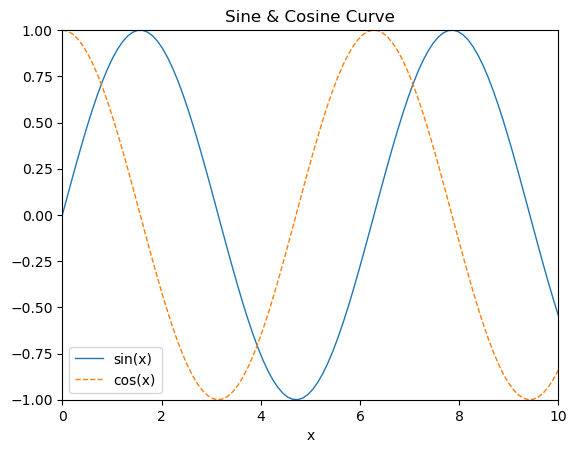

In [102]:
x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x), "-", linewidth=1, label="sin(x)")
plt.plot(x, np.cos(x), "--", linewidth=1, label="cos(x)")
plt.xlim(0, 10)
plt.ylim(-1, 1);
plt.title("Sine & Cosine Curve")
plt.xlabel("x")
plt.legend()


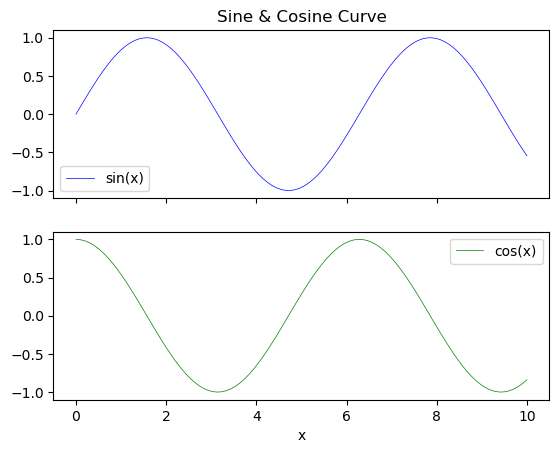

In [105]:
plt.subplot(211)
plt.plot(x, np.sin(x), 'b-', linewidth=0.5, label="sin(x)")
plt.title("Sine & Cosine Curve")
plt.xticks(np.arange(0, 10, 2), [])
plt.legend()

plt.subplot(212)
plt.plot(x, np.cos(x), 'g-', linewidth=0.5, label="cos(x)")
plt.xlabel("x")
plt.legend()

plt.show()


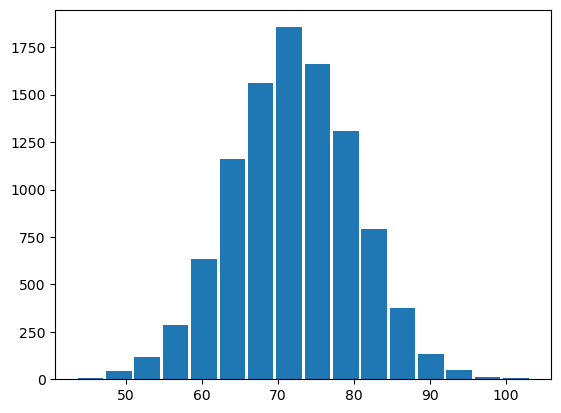

In [126]:
# 정규분포 객체 만들어서 히스토그램 그리기
x = np.random.normal(72, 8, 10000)
plt.hist(x, rwidth=0.9, bins=16)
plt.show()

# iris

In [110]:
iris = sns.load_dataset('iris')
species = iris.species.unique()
species

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [127]:
# pd.Categorical은 범주형 시리즈를 새로 생성
# 그 후 새로운 컬럼에 할당
iris['species_cat'] = pd.Categorical(iris.species)
iris['species_cat']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species_cat, Length: 150, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [128]:
# astype('category')는 object타입 데이터를 범주형 데이터로 명시할 때 사용
iris['species'].astype('category')

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']

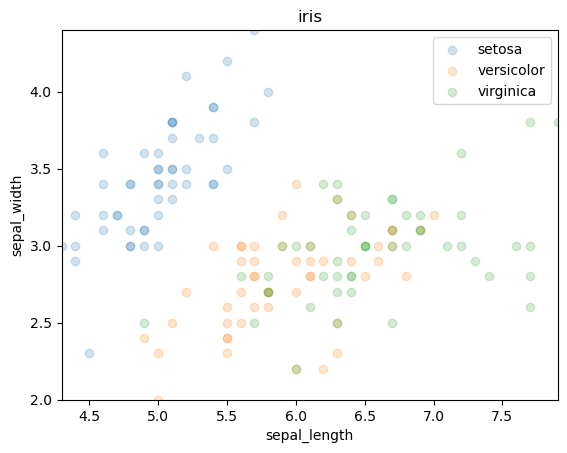

In [130]:
for sp in species:
    x = iris.loc[iris["species"] == sp, "sepal_length"]
    y = iris.loc[iris["species"] == sp, "sepal_width"]
    plt.scatter(x, y, label=sp, alpha=0.2)
plt.title("iris")
plt.xlim(iris.sepal_length.min(), iris.sepal_length.max())
plt.ylim(iris.sepal_width.min(), iris.sepal_width.max())
plt.xlabel(iris.columns[0])
plt.ylabel(iris.columns[1])
plt.legend()
plt.show()

# tips

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


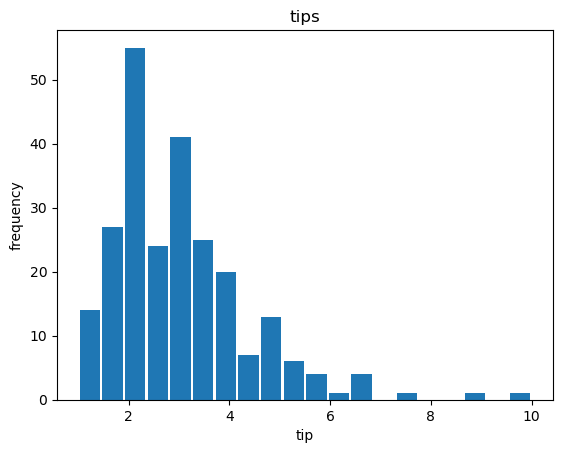

In [133]:
tips = sns.load_dataset("tips")
tips.info()


plt.hist(x = tips.tip, rwidth=0.9, bins = 20);
plt.title("tips")
plt.xlabel("tip")
plt.ylabel("frequency")
plt.show()

In [137]:
tips.loc[tips.sex == 'Female', 'tip'].describe()

count    87.000000
mean      2.833448
std       1.159495
min       1.000000
25%       2.000000
50%       2.750000
75%       3.500000
max       6.500000
Name: tip, dtype: float64

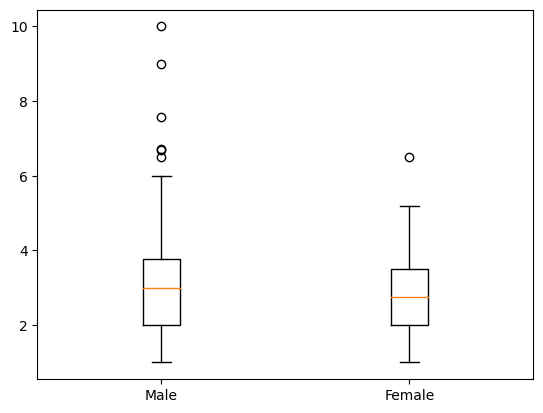

In [141]:
labels = []
tip_list = []

for label, df_per_sex in tips.groupby('sex'):
    labels.append(label)
    tip_list.append(df_per_sex['tip'].tolist())
    
plt.boxplot(tip_list, labels=labels)
plt.show()

# mnist

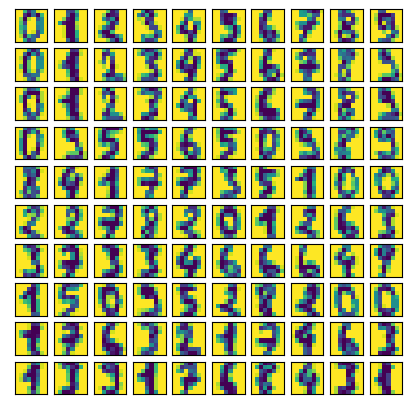

In [161]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.keys()


digits.images[0]


fig, ax = plt.subplots(10, 10, figsize=(5, 5))
for i, ax_i in enumerate(ax.flat):
    ax_i.imshow(digits.images[i], cmap=plt.cm.viridis_r)
    ax_i.set(xticks=[], yticks=[])


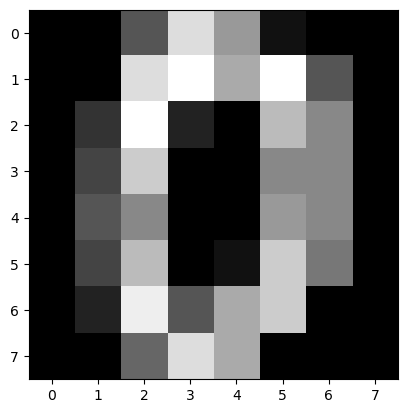

In [159]:
plt.imshow(digits.images[0], cmap='gray')
plt.show()

# Folium

In [162]:
import folium

latitude = 37.394946  # 위도
longitude = 127.111104  # 경도
m = folium.Map(location=[latitude, longitude],
               zoom_start=17, 
               width=750, 
               height=500
              )
m

In [163]:
folium.Marker([latitude, longitude],
              popup="판교역",
              tooltip="판교역 입구").add_to(m)
m

# AI Hub 데이터 활용

In [3]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import pandas as pd

1. 이미지 파일을 OpenCV 활용
2. 넘파이 행렬로 읽음
3. 파일이름 및 차원 shape, 각 채널의 mean, std 값을 저장


In [4]:
files = [x for x in glob.glob(f'db/**/**')]

info = []
for file in files :
    img = cv2.imread(file)
    img2 = cv2.resize(img,  dsize=(64, 64))
    mn = np.mean(img2, axis=(0,1))
    # 3차원 데이터에 대해 axis=(0,1)을 설정하는 이유
    # b, g, r로 이루어진 채널이 3개인 데이터이므로 
    # 각 채널의 모든 행열에 대해 mean을 수행
    # mean_r, mean_g, mean_b 3개로 압축됨
    st = np.std(img2, axis=(0,1))
    info.append([file, img.shape[0],  img.shape[1], img.shape[2], mn[0], mn[1], mn[2], st[0], st[1], st[2]    ])  

info = pd.DataFrame(info)
info.columns= ["name", "w", "h", "c", "b", "g", "r", "b2", "g2", "r2"]
info.to_csv("aihub.csv")

In [8]:
info = pd.read_csv("aihub.csv")
info

,Unnamed: 0,name,w,h,c,b,g,r,b2,g2,r2
0,0,db\L2_10\i_0016_2960_157494.jpg,2480,3508,3,211.890625,223.125000,232.018066,68.071759,54.731942,47.349625
1,1,db\L2_10\i_0016_2961_292387.jpg,300,300,3,222.585938,229.322510,214.581055,56.985148,46.422979,72.524674
2,2,db\L2_10\i_0016_2962_601583.jpg,300,300,3,218.028320,218.016846,235.036133,77.752014,77.800457,52.157305
3,3,db\L2_10\i_0016_2964_544010.jpg,3508,2480,3,231.377197,229.658691,228.778564,59.582942,62.541316,63.988338
4,4,db\L2_10\i_0016_2966_259178.jpg,1200,1200,3,230.229248,230.459229,230.349121,69.904807,69.584557,69.711113
...,...,...,...,...,...,...,...,...,...,...,...
957,957,db\L2_50\i_6922_36243_481440.png,300,545,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
958,958,db\L2_50\i_7609_09012_207762.png,300,545,3,255.000000,255.000000,255.000000,0.000000,0.000000,0.000000
959,959,db\L2_50\i_7811_18326_293800.png,300,545,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
960,960,db\L2_50\i_8005_16895_760368.png,300,545,3,255.000000,255.000000,255.000000,0.000000,0.000000,0.000000


In [9]:
# 경로명과 파일명에 있는 분류코드를 사용하여 클래스와 카테고리 컬럼 추가

def getCls(name) :
    return name.split("\\")[1]

def getCat(name) :
    return name.split("\\")[2].split("_")[1]


info['cla'] =  info['name'].apply (getCls) 
info['cat'] =  info['name'].apply (getCat) 
info[["name", "cla", "cat"]]

,name,cla,cat
0,db\L2_10\i_0016_2960_157494.jpg,L2_10,0016
1,db\L2_10\i_0016_2961_292387.jpg,L2_10,0016
2,db\L2_10\i_0016_2962_601583.jpg,L2_10,0016
3,db\L2_10\i_0016_2964_544010.jpg,L2_10,0016
4,db\L2_10\i_0016_2966_259178.jpg,L2_10,0016
...,...,...,...
957,db\L2_50\i_6922_36243_481440.png,L2_50,6922
958,db\L2_50\i_7609_09012_207762.png,L2_50,7609
959,db\L2_50\i_7811_18326_293800.png,L2_50,7811
960,db\L2_50\i_8005_16895_760368.png,L2_50,8005


In [112]:
# cla 속성에 대해서 학습 시키기 용이한 형태로 
# 인덱스 0부터의 연속형 값을 target 속성으로 저장

clas = info['cla'].drop_duplicates().values.tolist()

def getLabel(cla) :
    return  clas.index(cla)

info['target'] =  info['cla'].apply (getLabel) 
info[["name", "cla", "cat", "target"]]

,name,cla,cat,target
0,db\L2_10\i_0016_2960_157494.jpg,L2_10,0016,0
1,db\L2_10\i_0016_2961_292387.jpg,L2_10,0016,0
2,db\L2_10\i_0016_2962_601583.jpg,L2_10,0016,0
3,db\L2_10\i_0016_2964_544010.jpg,L2_10,0016,0
4,db\L2_10\i_0016_2966_259178.jpg,L2_10,0016,0
...,...,...,...,...
957,db\L2_50\i_6922_36243_481440.png,L2_50,6922,14
958,db\L2_50\i_7609_09012_207762.png,L2_50,7609,14
959,db\L2_50\i_7811_18326_293800.png,L2_50,7811,14
960,db\L2_50\i_8005_16895_760368.png,L2_50,8005,14
